In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as array

In [2]:
x = []
y = []
sds = []
with open('/Users/Gavin/Projects/Ventilator Flow Monitor/Data/DPS310 Elevation Data.csv') as f:
    for line in f:
        split_line = line.split(',')
        if 'm' in line and 'mu' not in line:
            x.append(float(line[:-4]))
        if 'mu' in line:
            y.append(float(split_line[-1]))
        if 'std' in line:
            sds.append(float(split_line[-1]))

In [4]:
x = np.array(x)
y = np.array(y)
sds = np.array(sds)

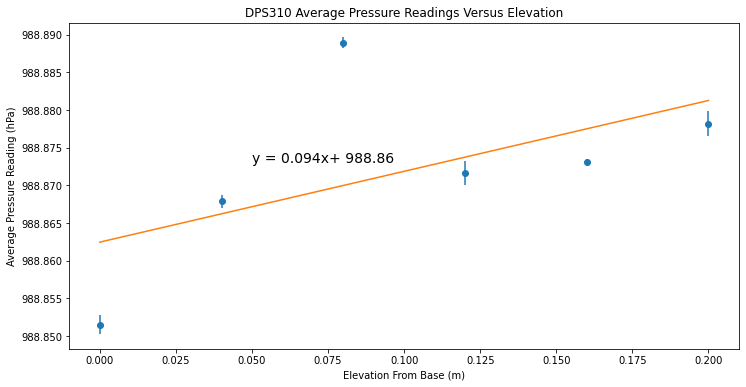

In [5]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.errorbar(x,y,yerr=sds,fmt='o')
ax1.ticklabel_format(useOffset=False)
m,b = np.polyfit(x,y,1)
ax1.plot(x,x*m+b)
ax1.set_xlabel('Elevation From Base (m)')
ax1.set_ylabel('Average Pressure Reading (hPa)')
ax1.set_title('DPS310 Average Pressure Readings Versus Elevation')
fit = 'y = ' + str(m)[:5] + 'x+ ' + str(b)[:6]
fig1.set_size_inches(12, 6)
ax1.text(.05,988.873, fit,fontsize=14)
fig1.savefig("/Users/Gavin/Projects/Ventilator Flow Monitor/Plots/DPS310 Pressure Change Versus Elevation", dpi=500)